In [1]:
import os
import platform

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
IS_WIN_OS = platform.platform().lower().startswith('windows')

if IS_WIN_OS:
    # It's for Igloo's external desktop
    DATAPATH = "c:/code/datasets/kakao_music_playlist/raw"
else:
    # It's for my Linux labtop
    DATAPATH = "/home/rrbb/code/datasets/kakao/melon-playlist-recommendation"

X_train = pd.read_json(os.path.join(DATAPATH, 'train.json'))
X_valid = pd.read_json(os.path.join(DATAPATH, 'val.json'))
X_pred = pd.read_json(os.path.join(DATAPATH, 'test.json'))

In [3]:
dt = pd.to_datetime(X_train.updt_date).dt.strftime('%Y-%m')

In [4]:
X_train['grp_ym'] = dt

In [5]:
group_obj = X_train.groupby(X_train['grp_ym'])

In [7]:
group_obj['grp_ym'].count()

grp_ym
2004-11       2
2004-12       3
2005-01       4
2005-02       4
2005-03       8
2005-04       7
2005-05      27
2005-06      39
2005-07      12
2005-08      11
2005-09      26
2005-10      15
2005-11      45
2005-12      42
2006-01      72
2006-02      60
2006-03      82
2006-04      73
2006-05      62
2006-06      58
2006-07      69
2006-08      62
2006-09      85
2006-10     102
2006-11     109
2006-12      91
2007-01      81
2007-02      70
2007-03      76
2007-04      95
           ... 
2017-11    1843
2017-12    1441
2018-01    1575
2018-02    1546
2018-03    1307
2018-04    1237
2018-05    1012
2018-06     935
2018-07     985
2018-08    1042
2018-09     818
2018-10     955
2018-11    1080
2018-12    1008
2019-01     885
2019-02     841
2019-03    1854
2019-04    2010
2019-05    2058
2019-06    1419
2019-07    1564
2019-08    1429
2019-09    1469
2019-10    1911
2019-11    2427
2019-12    3422
2020-01    2399
2020-02    3362
2020-03    4688
2020-04    6158
Name: grp_ym, Len

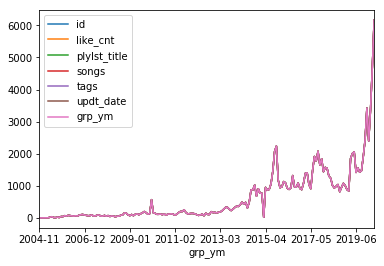

In [8]:
group_obj.count().plot()

In [9]:
playlist_lenghs = X_train.songs.apply(lambda x: len(x))
playlist_lenghs.sort_values(inplace=True)

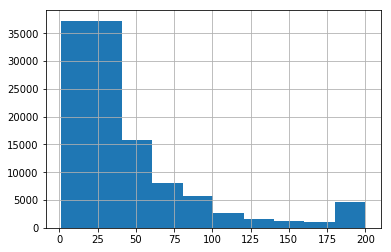

In [10]:
playlist_lenghs.hist()

In [11]:
X_train.head()

,id,like_cnt,plylst_title,songs,tags,updt_date,grp_ym
0,61281,71,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",[락],2013-12-19 18:36:19.000,2013-12
1,10532,1,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...","[추억, 회상]",2014-12-02 16:19:42.000,2014-12
2,76951,17,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...","[까페, 잔잔한]",2017-08-28 07:09:34.000,2017-08
3,147456,33,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...","[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",2019-12-05 15:15:18.000,2019-12
4,27616,9,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",[댄스],2011-10-25 13:54:56.000,2011-10


In [13]:
np.arange(10)+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
from tqdm import tqdm

In [26]:
candidates = []

for idx in tqdm(range(X_train.shape[0])):
    candidates += X_train['songs'].iloc[idx]
candidates = sorted(list(set(candidates)))


100%|██████████| 115071/115071 [00:02<00:00, 56838.64it/s]

100

In [45]:
X_pred[X_pred.songs.apply(lambda x : False if len(x) < 100 else True)]

,id,like_cnt,plylst_title,songs,tags,updt_date
39,46475,56,,"[254435, 473716, 74624, 448738, 319861, 671533...",[추억],2015-05-04 19:41:30.000
109,25204,5,,"[408881, 397800, 148674, 291201, 585297, 57705...",[],2019-07-08 15:39:29.000
132,3182,18,,"[150679, 644724, 344386, 604119, 657787, 12396...",[],2019-09-04 21:38:41.000
151,19035,21,,"[498758, 454890, 125861, 263604, 131015, 51801...","[트로트, 사무실, 동요]",2019-12-05 11:05:39.000
277,18860,3,,"[628672, 49704, 211082, 51567, 586001, 687126,...",[잔잔한],2015-05-19 19:09:43.000
282,58395,3,,"[134890, 59150, 431933, 120222, 97947, 6391, 3...",[],2018-10-16 06:31:05.000
401,138022,63,,"[204411, 269540, 558207, 456474, 130804, 55463...",[],2019-12-25 06:48:44.000
416,3895,0,,"[628489, 282417, 617896, 264902, 646677, 25646...",[],2018-04-10 15:29:42.000
455,137398,1220,,"[198476, 91388, 511814, 346604, 120465, 643825...","[SWAG, 랩, HipHop, 해외힙합]",2020-01-17 03:18:42.000
540,29702,7,,"[672577, 155952, 613077, 645005, 97094, 422176...",[],2016-02-26 22:59:52.000


In [63]:
X_pred.iloc[39]['songs']

[254435,
 473716,
 74624,
 448738,
 319861,
 671533,
 700850,
 225510,
 701766,
 233708,
 103192,
 185109,
 390491,
 371893,
 459071,
 495997,
 79907,
 398985,
 252230,
 389246,
 501335,
 130991,
 141998,
 96373,
 600640,
 406300,
 578413,
 219725,
 576236,
 210512,
 631477,
 420730,
 176059,
 72398,
 519662,
 326088,
 424703,
 695656,
 25206,
 224139,
 379017,
 285472,
 577814,
 659122,
 274328,
 678202,
 35867,
 323931,
 691017,
 643629,
 507217,
 574523,
 347608,
 198635,
 260730,
 282995,
 82293,
 138221,
 52530,
 142144,
 398909,
 423293,
 513806,
 664191,
 217739,
 30712,
 579307,
 375914,
 228514,
 63809,
 492125,
 231715,
 449457,
 4745,
 672208,
 17496,
 282007,
 593089,
 104264,
 259298,
 310375,
 470374,
 127681,
 422595,
 25144,
 643315,
 356537,
 663527,
 19030,
 575562,
 587061,
 386253,
 18821,
 9027,
 112403,
 650786,
 61595,
 502122,
 491356,
 547940]

In [31]:
DATAPATH

'/home/rrbb/code/datasets/kakao/melon-playlist-recommendation'

In [32]:
%ls /home/rrbb/code/datasets/kakao/melon-playlist-recommendation/t

genre_gn_all.json  song_meta.json  train.json        val.json
README.md          test.json       Untitled Folder/


In [65]:
pd.DataFrame(dict(a=[1,2], b=[3,4]))


,a,b
0,1,3
1,2,4
